# **Solar Data Discovery** 

## **Togo Data Profiling, Cleaning, and EDA**

In [1]:
import sys
import os
import matplotlib as plt
import importlib
system_path = os.path.abspath('..')
if system_path in sys.path:
    print('Path already exist')
else:
    sys.path.append(system_path)

In [2]:
%load_ext autoreload
%autoreload 2
import importlib
from scripts import data_analysis
importlib.reload(data_analysis)


<module 'scripts.data_analysis' from 'd:\\10Acadamy\\New 10 Acadamy\\solar-challenge-week1\\scripts\\data_analysis.py'>

In [3]:
data = data_analysis.load_data('../data/togo-dapaong_qc.csv')

In [4]:
data

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-10-24 23:56,-0.8,0.0,0.0,0.0,0.0,25.2,53.8,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,NaN
525596,2022-10-24 23:57,-0.9,0.0,0.0,0.0,0.0,25.3,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,NaN
525597,2022-10-24 23:58,-1.0,0.0,0.0,0.0,0.0,25.3,53.4,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.2,23.9,NaN
525598,2022-10-24 23:59,-1.1,0.0,0.0,0.0,0.0,25.4,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.1,23.8,NaN


In [5]:
from scripts.data_analysis import *

# Check for missing values
missing_values = check_missing_values(data)
print("Missing Values Count:")
print(missing_values)

# Specify columns for cleaning and outlier detection
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Clean the data
cleaned_df = clean_data(data, columns_to_check)

# Print cleaned data info
print("\nCleaned Data Summary:")
print(cleaned_df.describe())

Missing Values Count:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Cleaned Data Summary:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%

In [6]:
# Specify columns for Z-score computation and cleaning
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Clean the data
cleaned_df = clean_data(data, columns_to_check)

# Compute Z-scores
z_scores = compute_z_scores(cleaned_df, columns_to_check)

# Flag outliers
outlier_flags = flag_outliers(z_scores)

# Print flagged rows
print("\nFlagged Outlier Rows:")
print(cleaned_df[outlier_flags])


Flagged Outlier Rows:
               Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
4985    2021-10-28 11:06  1139.0  805.1  466.1  1172.0  1154.0  29.8  70.8   
5410    2021-10-28 18:11    -1.2    0.0    0.0     0.0     0.0  29.7  63.5   
5411    2021-10-28 18:12    -1.0    0.0    0.0     0.0     0.0  29.3  62.4   
5413    2021-10-28 18:14    -0.8    0.0    0.0     0.0     0.0  28.6  63.7   
5420    2021-10-28 18:21    -1.3    0.0    0.0     0.0     0.0  27.7  64.5   
...                  ...     ...    ...    ...     ...     ...   ...   ...   
510473  2022-10-14 11:54   709.5   63.7  629.8   703.1   694.9  30.2  66.6   
510474  2022-10-14 11:55   677.8   40.6  621.7   670.1   662.2  30.2  66.7   
510475  2022-10-14 11:56   659.5   29.7  614.9   651.0   643.4  30.3  66.1   
510476  2022-10-14 11:57   660.1   40.7  605.6   653.2   645.6  30.2  66.0   
510477  2022-10-14 11:58   655.8   50.2  591.0   647.5   639.9  30.2  66.2   

         WS  WSgust  WSstdev     WD  WDs

## Exporting The Ceaned Dataset and saving as sierraleone_clean.csv

In [7]:
cleaned_df.to_csv("../data/togo_clean.csv", index =False)

# Time Series Analysis
## Line charts of GHI, DNI, DHI, Tamb vs. Timestamp. with script call

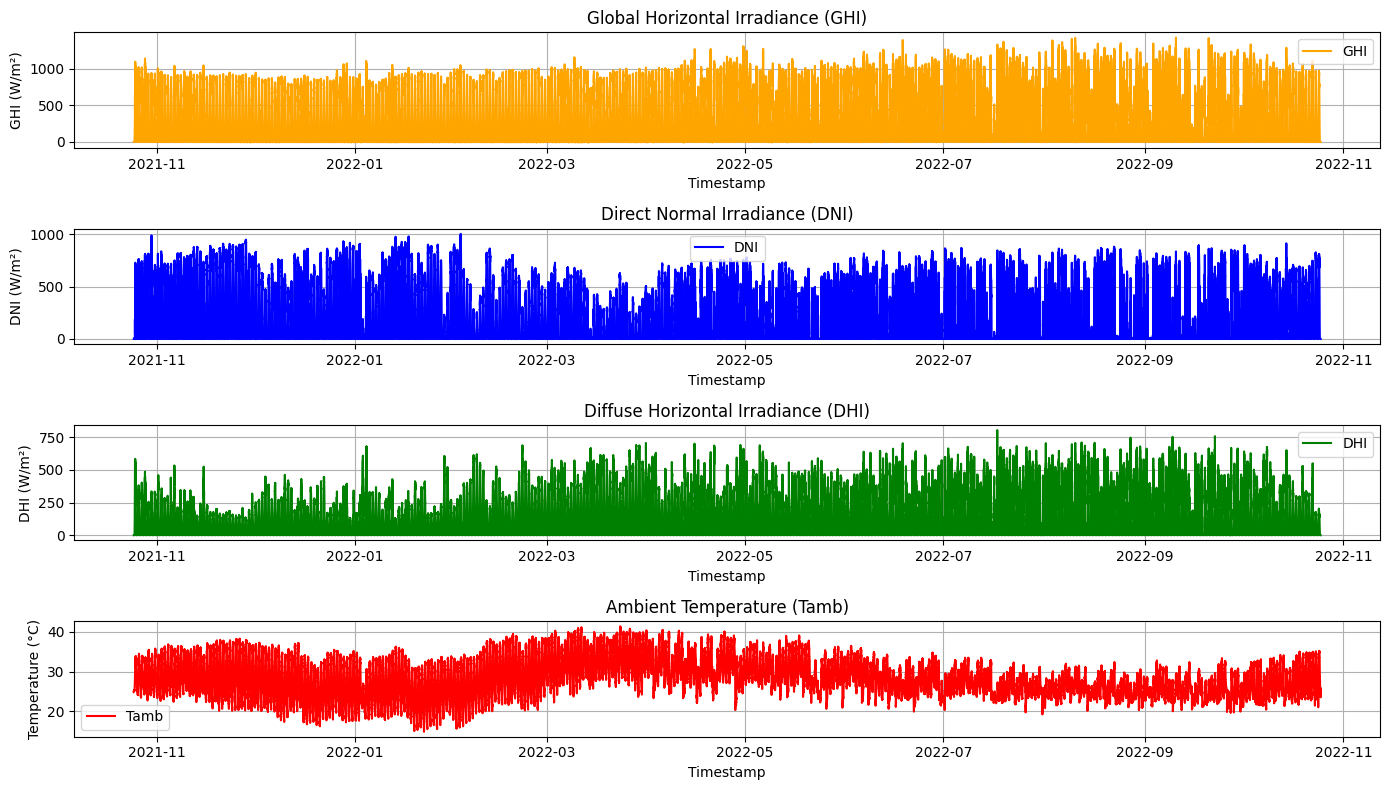

In [9]:
plot_time_series(cleaned_df)

# Time Series Analysis
## Observe patterns by month, trends throughout day, or anomalies, such as peaks in solar irradiance or temperature fluctuations.

d:\10Acadamy\New 10 Acadamy\solar-challenge-week1\scripts\data_analysis.py:105: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.resample('M').mean()


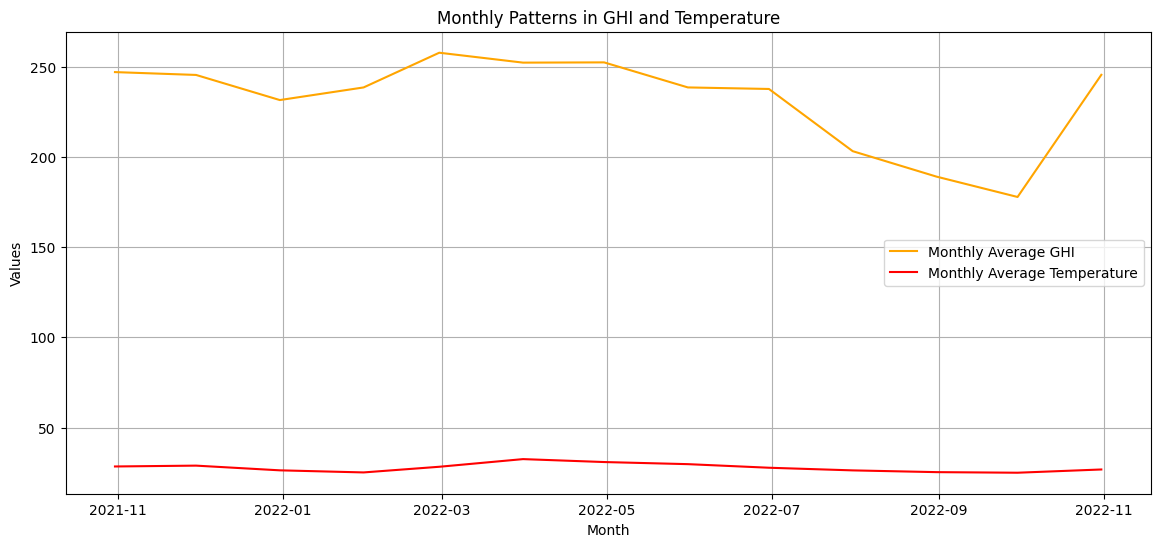

In [10]:
plot_monthly_patterns(cleaned_df)

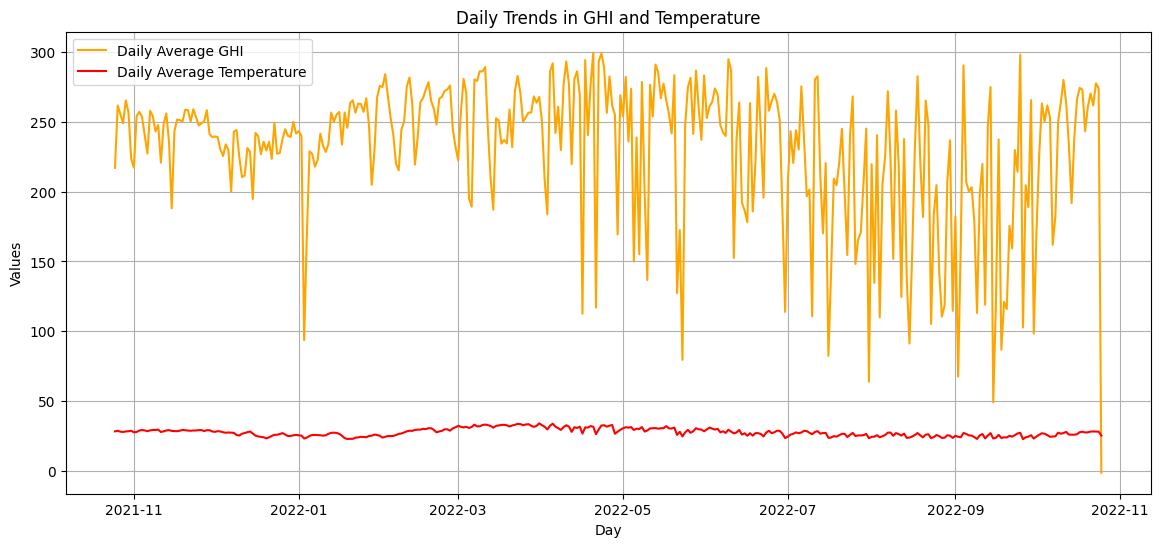

In [11]:
plot_daily_trends(cleaned_df)

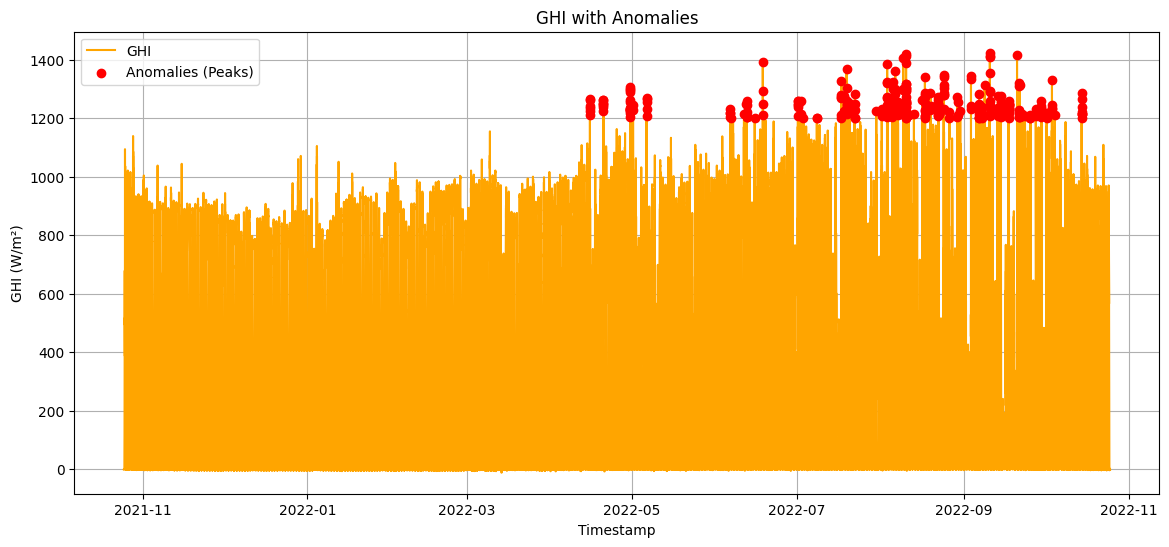

In [12]:
detect_anomalies(cleaned_df)

Available columns: Index(['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust',
       'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA',
       'TModB', 'Comments'],
      dtype='object')


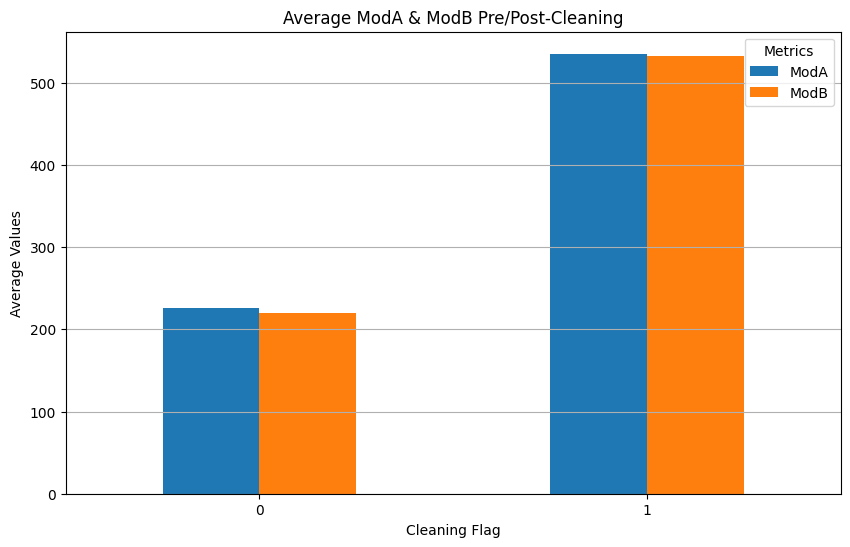

In [13]:
plot_cleaning_impact(cleaned_df)

# Correlation & Relationship Analysis

## Heatmap of correlations (GHI, DNI, DHI, TModA, TModB).

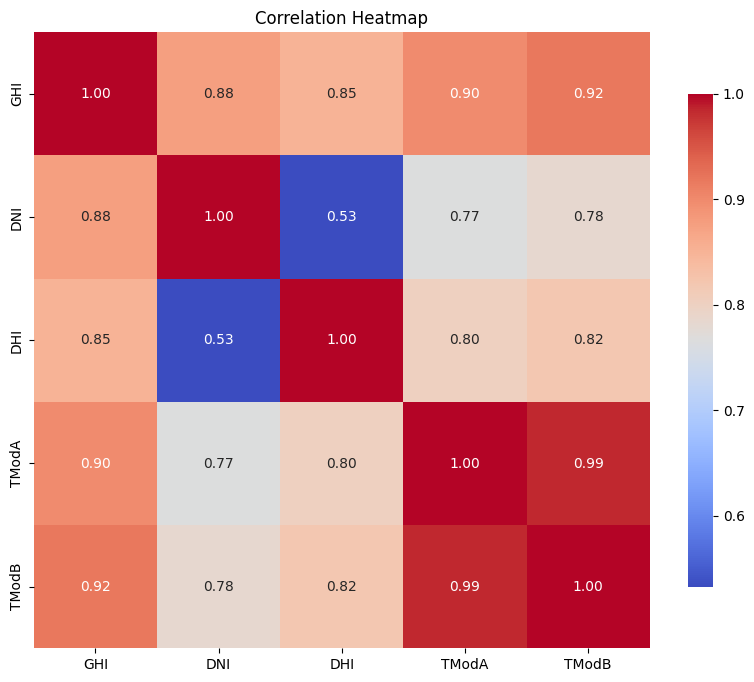

In [14]:
plot_correlation_heatmap(cleaned_df)

## Scatter plots: WS, WSgust, WD vs. GHI; RH vs. Tamb or RH vs. GHI.

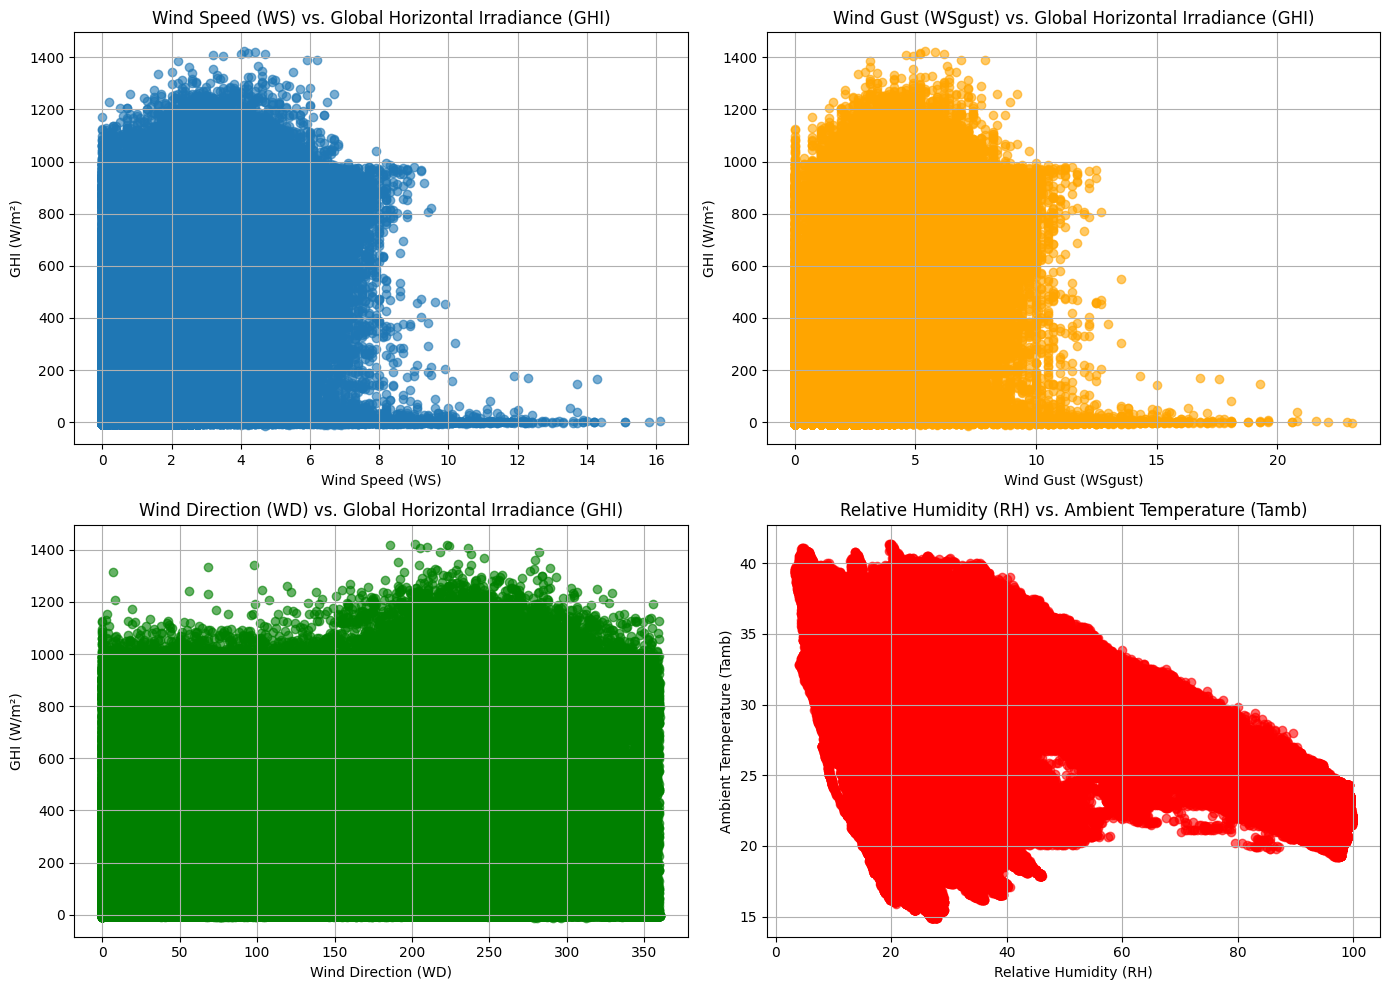

In [15]:
plot_scatter_plots(cleaned_df)

# Wind & Distribution Analysis
## Wind rose or radial bar plot of WS/WD.

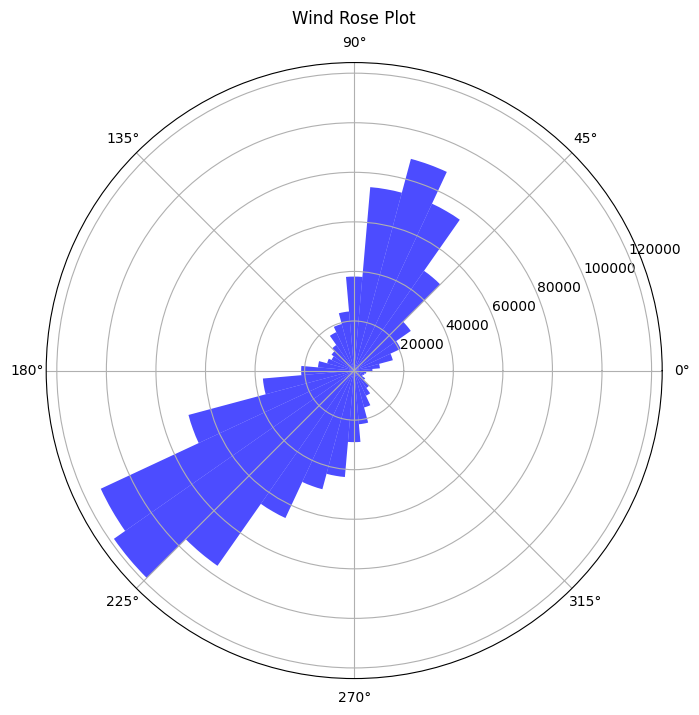

In [16]:
plot_wind_rose(cleaned_df)

# Wind & Distribution Analysis
## Histograms for GHI and one other variable (e.g. WS).

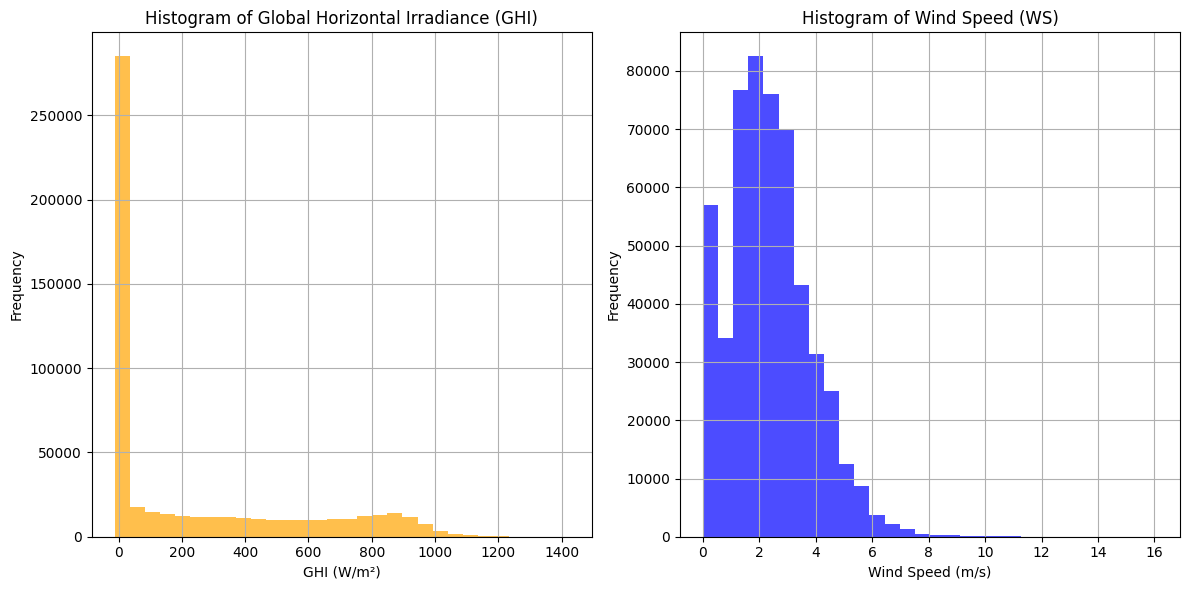

In [17]:
plot_histograms(cleaned_df)

# Temperature Analysis
## Examine how relative humidity (RH) might influence temperature readings and solar radiation.


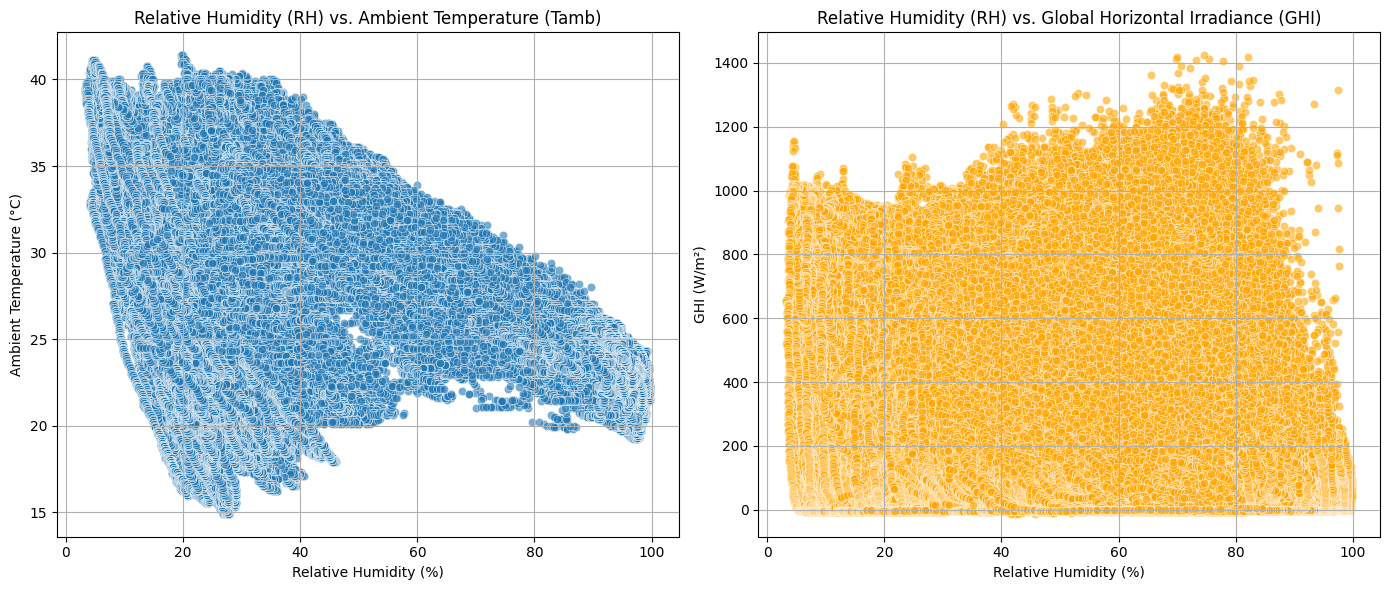

In [18]:
plot_relationships(cleaned_df)

In [19]:
calculate_correlations(cleaned_df)

Correlation between RH and Tamb: -0.40
Correlation between RH and GHI: -0.26


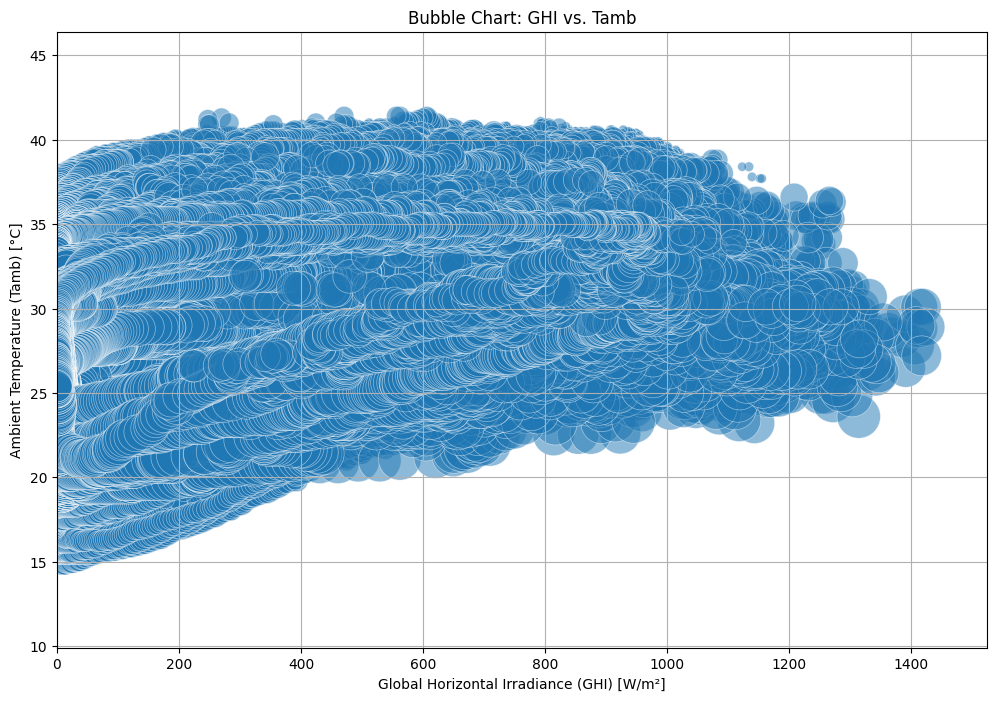

In [20]:
plot_bubble_chart(cleaned_df)